# October 31th, 2021

**Motivation**: Hierarchical using No GSR <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice((768, 4), load_parcel=True, load_allen=True)

In [3]:
#mice.setup_anat_data()
#mice.setup_preproc_data(False, True)

In [4]:
mice.setup_func_data()

In [9]:
mice.cat_data(verbose=True)

[PROGRESS] 'sub-SLC01_ses-1_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC01_ses-2_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC01_ses-3_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC02_ses-1_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC02_ses-2_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC02_ses-3_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC03_ses-1_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC03_ses-2_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC03_ses-3_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC04_ses-1_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC04_ses-2_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC04_ses-3_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC05_ses-1_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC05_ses-2_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC05_ses-3_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC06_ses-1_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC06_ses-2_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC06_ses-3_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC07_ses-1_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC07_ses-2_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC07_ses-3_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC08_ses-1_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC08_ses-2_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC08_ses-3_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC09_ses-1_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC09_ses-2_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC09_ses-3_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC10_ses-1_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC10_ses-2_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC01_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC02_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC03_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC04_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC05_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC06_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC07_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC08_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC09_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC10_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC_ses-1_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC_ses-2_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC_ses-3_task-rest_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC01_ses-1_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC01_ses-2_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC01_ses-3_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC02_ses-1_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC02_ses-2_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC02_ses-3_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC03_ses-1_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC03_ses-2_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC03_ses-3_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC04_ses-1_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC04_ses-2_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC04_ses-3_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC05_ses-1_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC05_ses-2_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC05_ses-3_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC06_ses-1_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC06_ses-2_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC06_ses-3_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC07_ses-1_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC07_ses-2_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC07_ses-3_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC08_ses-1_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC08_ses-2_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC08_ses-3_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC09_ses-1_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC09_ses-2_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC09_ses-3_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC10_ses-1_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC10_ses-2_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC01_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC02_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC03_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC04_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC05_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC06_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC07_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC08_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC09_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC10_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC_ses-1_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC_ses-2_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC_ses-3_task-led_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

Warning, sub-SLC: 58 % of ROIs are nan. Moving on . . .

Warning, sub-SLC_ses-2: 50 % of ROIs are nan. Moving on . . .

Warning, sub-SLC_ses-2: 50 % of ROIs are nan. Moving on . . .

Warning, sub-SLC_ses-2: 50 % of ROIs are nan. Moving on . . .

[PROGRESS] 'sub-SLC01_ses-1_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC01_ses-2_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC01_ses-3_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC02_ses-1_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC02_ses-2_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC02_ses-3_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC03_ses-1_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC03_ses-2_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC03_ses-3_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC04_ses-1_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC04_ses-2_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC04_ses-3_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC05_ses-1_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC05_ses-2_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC05_ses-3_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC06_ses-1_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC06_ses-2_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC06_ses-3_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC07_ses-1_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC07_ses-2_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC07_ses-3_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC08_ses-1_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC08_ses-2_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC08_ses-3_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC09_ses-1_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC09_ses-2_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC09_ses-3_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC10_ses-1_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC10_ses-2_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC01_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC02_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC03_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC04_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC05_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC06_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC07_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC08_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC09_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC10_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC_ses-1_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC_ses-3_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

[PROGRESS] 'sub-SLC_ses-2_task-all_space-CCF2d_desc-nogsr-cat_ca2.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/ca2

Warning, sub-SLC08_ses-1_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC10_ses-2_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC08_ses-1_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC10_ses-2_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC08_ses-1_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC10_ses-2_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC08_ses-1_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC10_ses-2_run-1: 100 % of ROIs are nan. Moving on . . .

[PROGRESS] 'sub-SLC01_ses-1_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC01_ses-2_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC01_ses-3_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC02_ses-1_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC02_ses-2_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC02_ses-3_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC03_ses-1_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC03_ses-2_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC03_ses-3_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC04_ses-1_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC04_ses-2_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC04_ses-3_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC05_ses-1_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC05_ses-2_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC05_ses-3_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC06_ses-1_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC06_ses-2_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC06_ses-3_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC07_ses-1_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC07_ses-2_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC07_ses-3_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC08_ses-1_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC08_ses-2_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC08_ses-3_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC09_ses-1_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC09_ses-2_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC09_ses-3_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC10_ses-1_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC10_ses-2_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC01_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC02_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC03_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC04_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC05_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC06_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC07_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC08_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC09_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC10_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC_ses-1_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC_ses-2_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC_ses-3_task-rest_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC01_ses-1_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC01_ses-2_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC01_ses-3_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC02_ses-1_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC02_ses-2_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC02_ses-3_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC03_ses-1_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC03_ses-2_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC03_ses-3_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC04_ses-1_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC04_ses-2_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC04_ses-3_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC05_ses-1_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC05_ses-2_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC05_ses-3_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC06_ses-1_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC06_ses-2_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC06_ses-3_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC07_ses-1_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC07_ses-2_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC07_ses-3_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC08_ses-1_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC08_ses-2_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC08_ses-3_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC09_ses-1_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC09_ses-2_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC09_ses-3_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC10_ses-1_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC10_ses-2_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC01_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC02_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC03_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC04_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC05_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC06_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC07_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC08_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC09_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC10_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC_ses-1_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC_ses-2_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC_ses-3_task-led_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

Warning, sub-SLC08_ses-1_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC10_ses-2_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC08_ses-1_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC10_ses-2_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC08_ses-1_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC10_ses-2_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC08_ses-1_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC10_ses-2_run-1: 100 % of ROIs are nan. Moving on . . .

[PROGRESS] 'sub-SLC01_ses-1_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC01_ses-2_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC01_ses-3_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC02_ses-1_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC02_ses-2_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC02_ses-3_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC03_ses-1_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC03_ses-2_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC03_ses-3_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC04_ses-1_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC04_ses-2_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC04_ses-3_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC05_ses-1_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC05_ses-2_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC05_ses-3_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC06_ses-1_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC06_ses-2_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC06_ses-3_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC07_ses-1_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC07_ses-2_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC07_ses-3_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC08_ses-1_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC08_ses-2_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC08_ses-3_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC09_ses-1_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC09_ses-2_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC09_ses-3_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC10_ses-1_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC10_ses-2_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC01_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC02_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC03_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC04_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC05_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC06_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC07_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC08_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC09_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC10_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC_ses-1_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC_ses-2_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'sub-SLC_ses-3_task-all_space-CCF3d_desc-gsr-cat_bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/bold

[PROGRESS] 'combine_meta.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4

[PROGRESS] fit columnar: initiated

Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


[PROGRESS] kmeans fit: done

[PROGRESS] save 2D 10um: done

[PROGRESS] 2d --> 3d: done

[PROGRESS] fill gaps: done

[PROGRESS] save 3D 10um: done

[PROGRESS] downsample: done

Warning! missing regions:
'[2388, 2392, 2397, 2403, 2430, 3022, 3030, 3038, 3051, 4692, 4696, 5416, 5444, 5447, 5460, 
5464, 5469, 5475, 6094, 6102, 6121]'

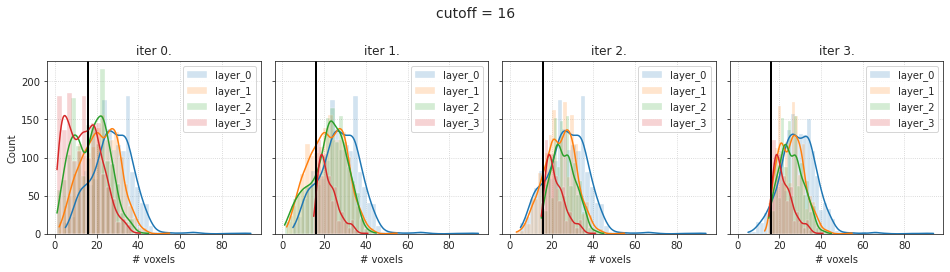

[PROGRESS] merge: done

Warning, region '199' is flat

Warning, region '432' is flat

Warning, region '534' is flat

Warning, region '537' is flat

Warning, region '560' is flat

Warning, region '586' is flat

Warning, region '614' is flat

[PROGRESS] erode: done

num regions,    left: 2318,  right: 2318
region id diff,         r - l:  Counter({3072: 2318})

[PROGRESS] fit columnar: done

[PROGRESS] 'meta_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/parcellation

[PROGRESS] 'cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/parcellation

[PROGRESS] 'cortex-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/parcellation

[PROGRESS] 'cortex-raw_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/parcellation

[PROGRESS] 'cortex-eroded_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/parcellation

[PROGRESS] 'subcortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/parcellation

[PROGRESS] 'subcortex-l_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/parcellation

[PROGRESS] 'subcortex-r_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/parcellation

[PROGRESS] 'cortex-regions_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/parcellation

[PROGRESS] 'merged-regions_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/parcellation

[PROGRESS] 'top-regions_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/parcellation

[PROGRESS] 'merged-ids_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/parcellation

[PROGRESS] 'nonzero-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/parcellation

[PROGRESS] 'region-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/parcellation

[PROGRESS] 'region-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/parcellation

[PROGRESS] 'region-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-768*4/parcellation

[PROGRESS] save results: done.

CPU times: user 7h 15min 31s, sys: 1h 12min 8s, total: 8h 27min 40s
Wall time: 56min 1s


In [4]:
%%time

mice.parcel.fit_parcel(True, cutoff=2)

In [5]:
from register.register import Register
reg = Register(mice)
reg.register_anat(True)

registering anat sub-SLC10_ses-2: 100%|██████████| 29/29 [22:20<00:00, 46.22s/it]


/home/hadi/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



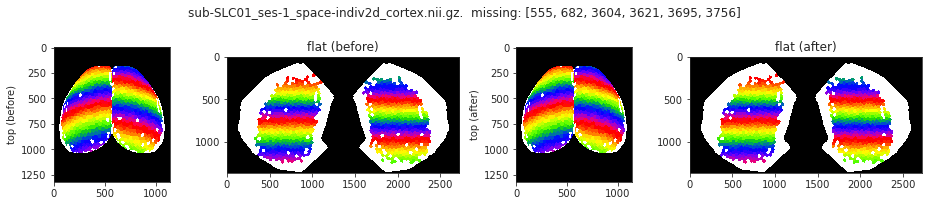

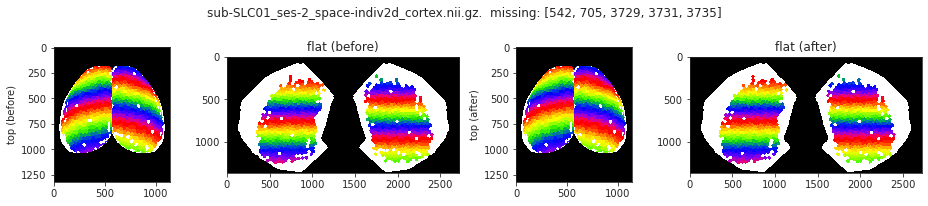

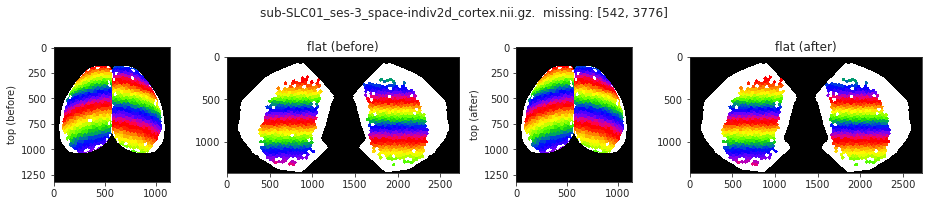

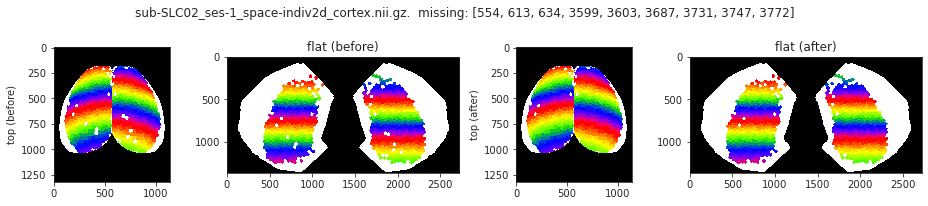

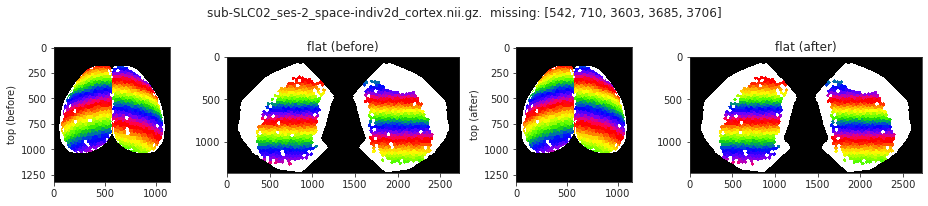

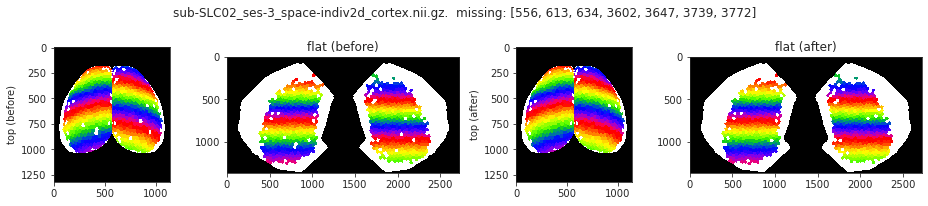

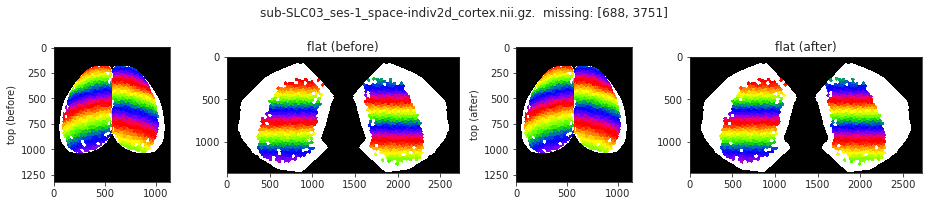

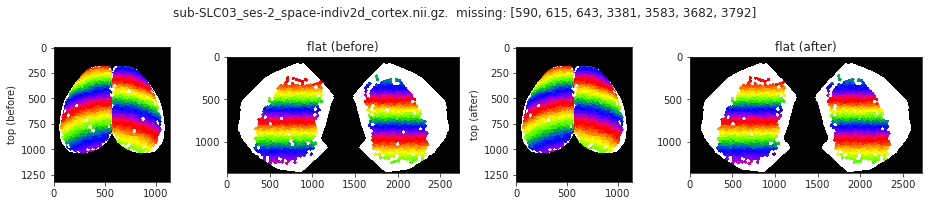

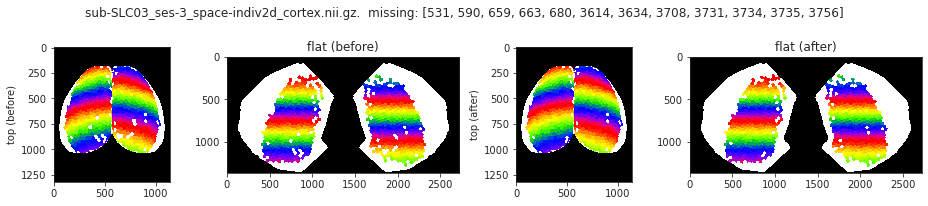

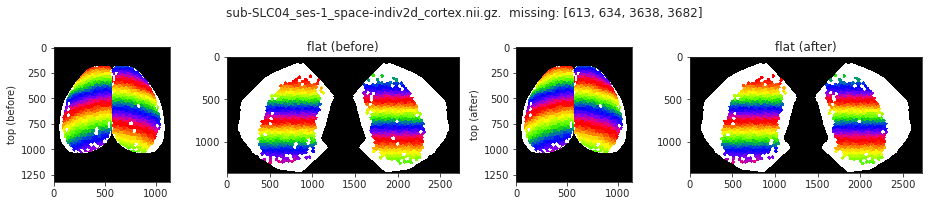

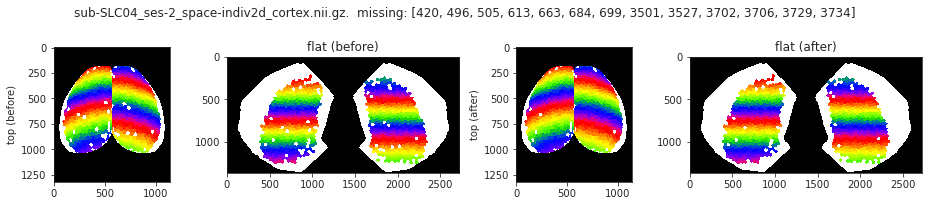

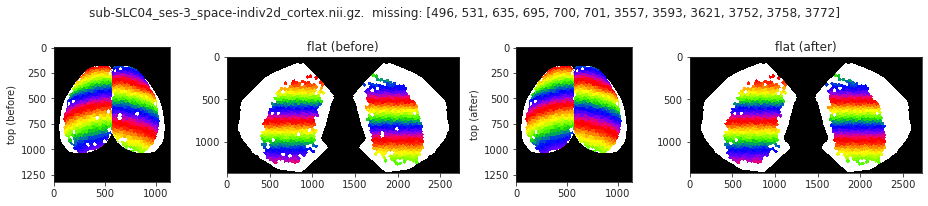

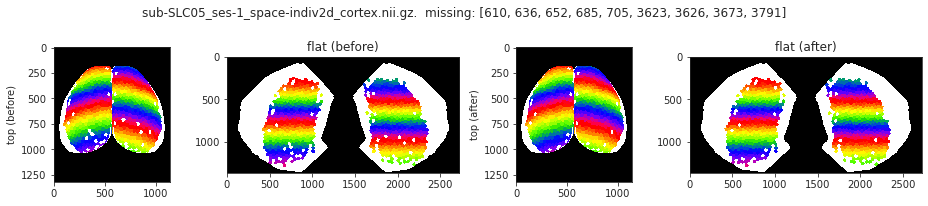

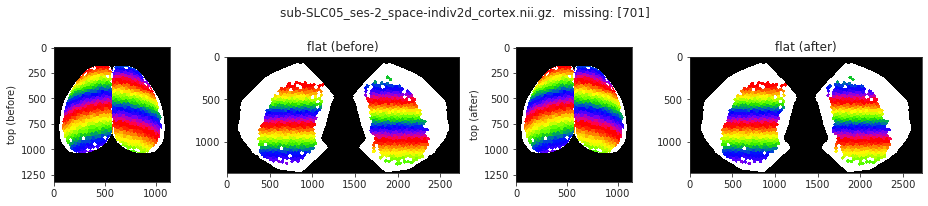

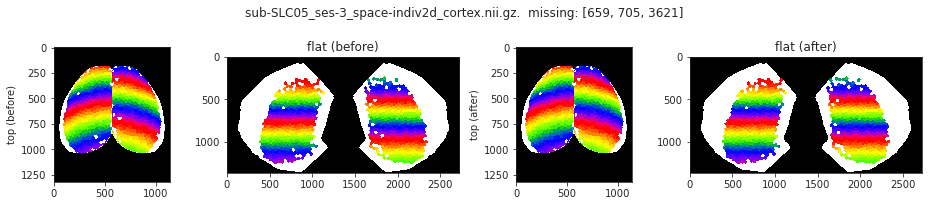

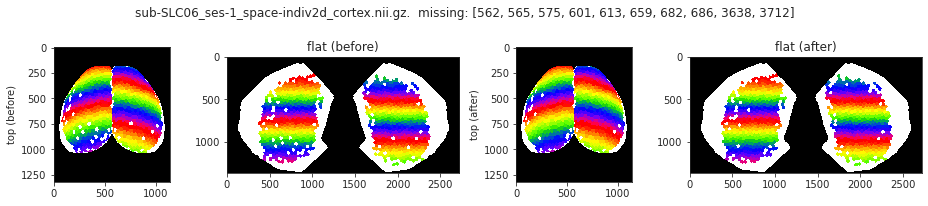

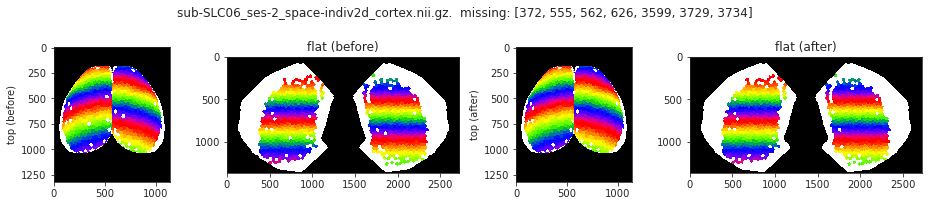

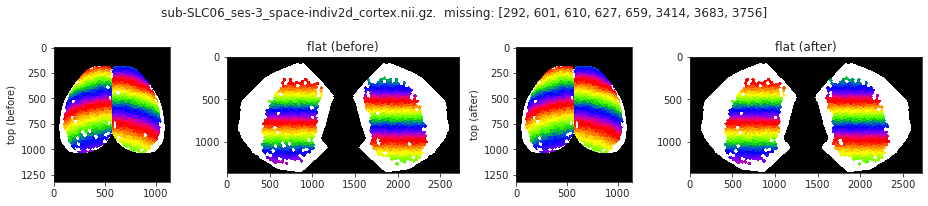

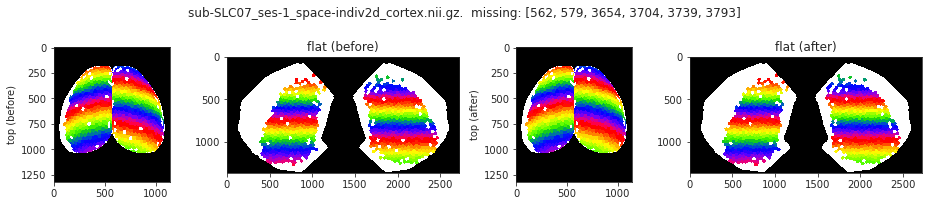

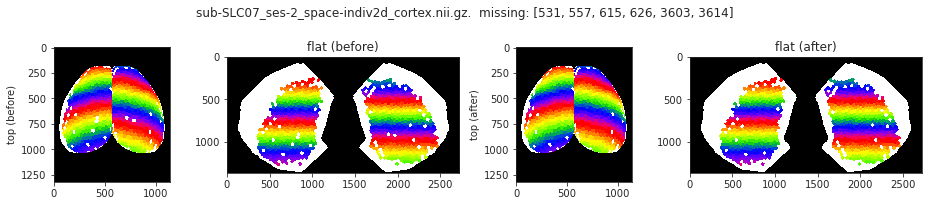

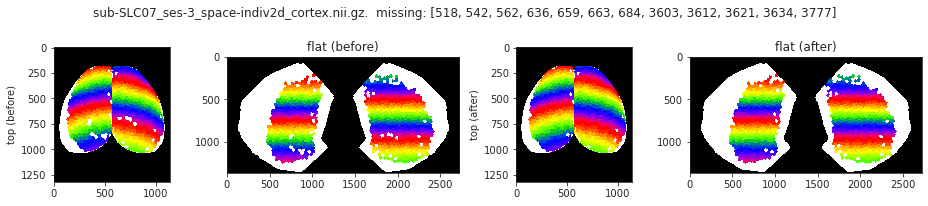

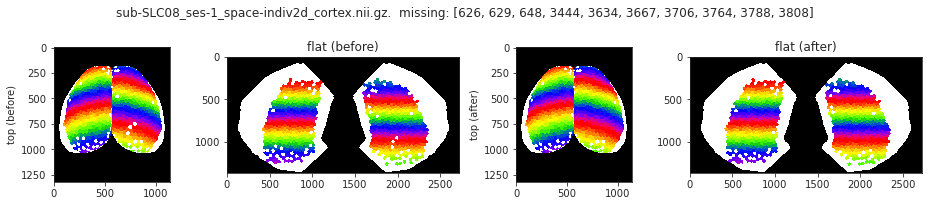

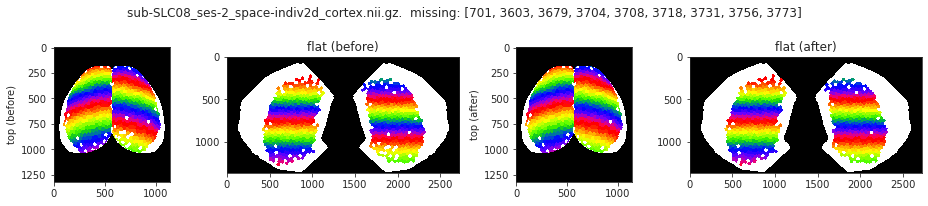

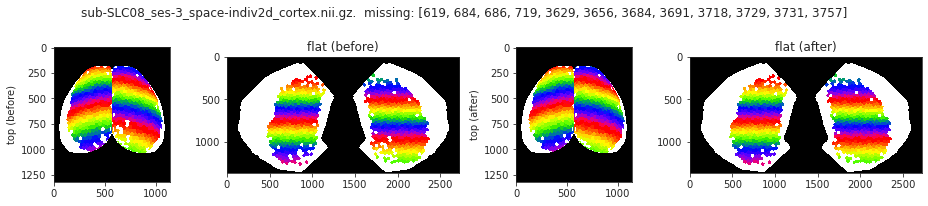

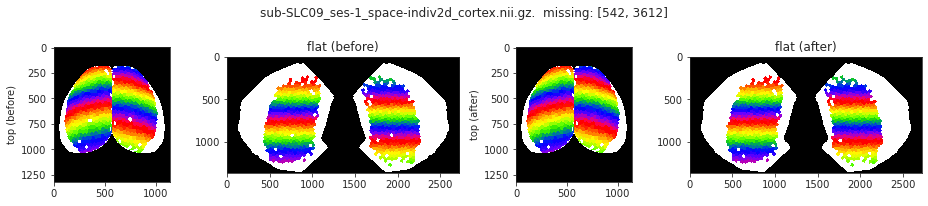

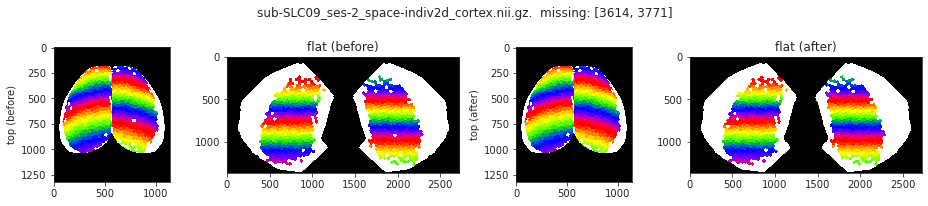

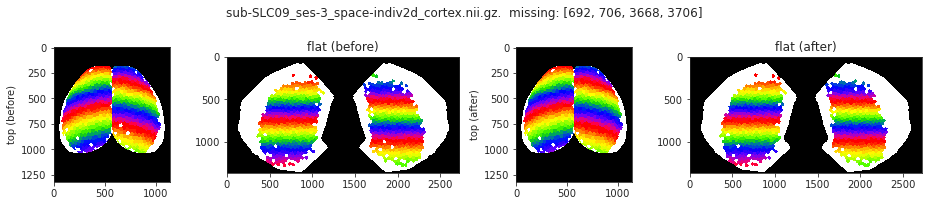

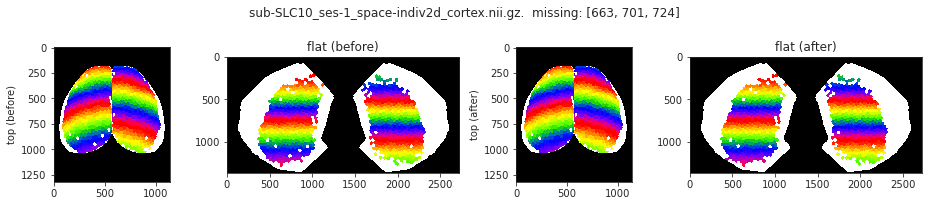

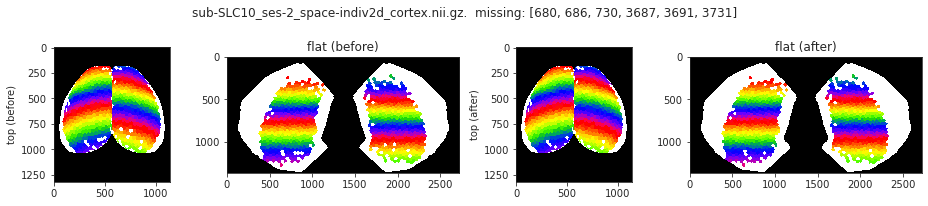

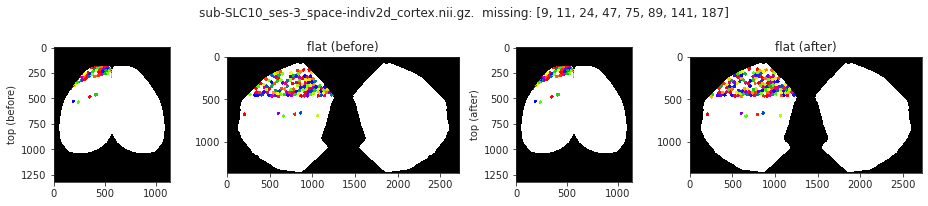

In [6]:
mice.parcel.fill_rois_2d()

In [8]:
mice.setup_anat_data()

/home/hadi/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



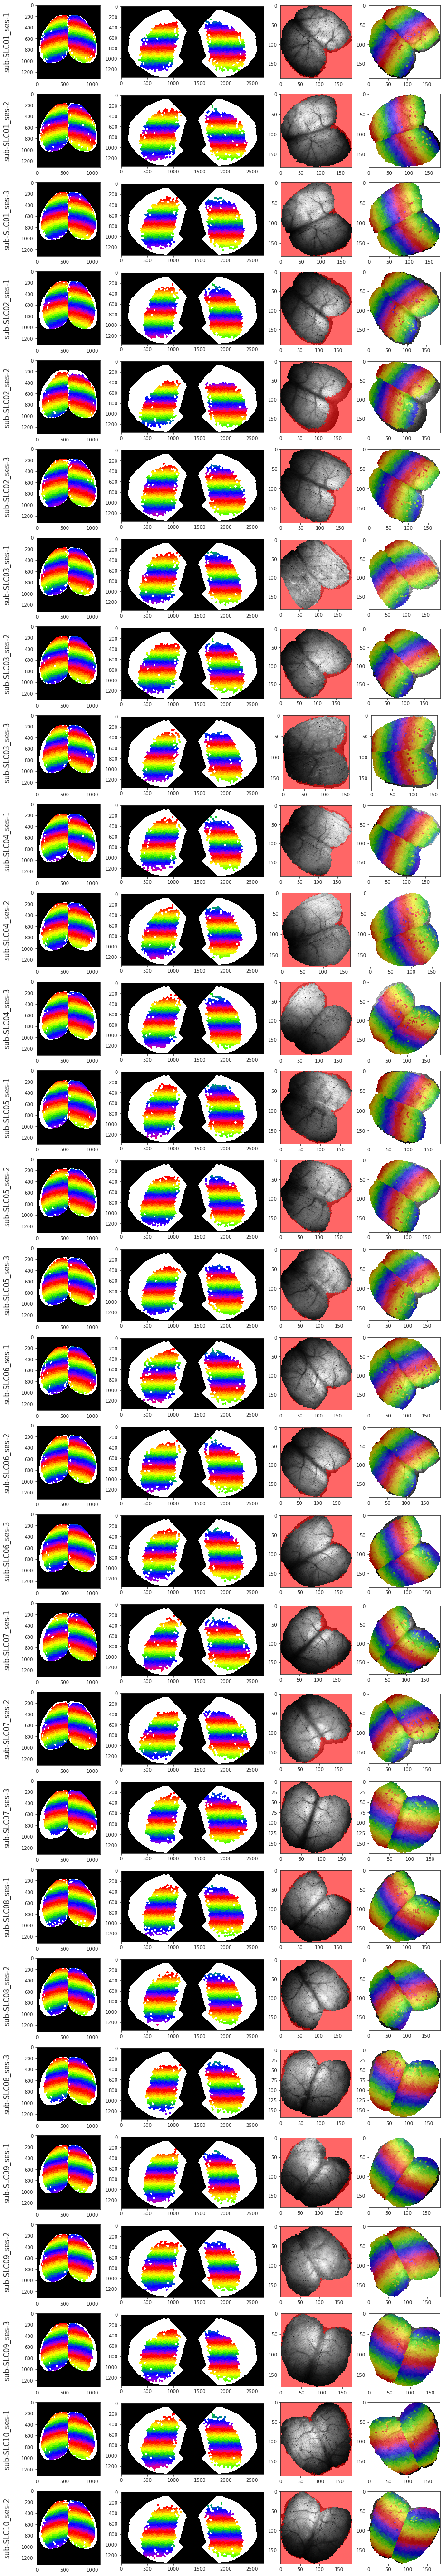

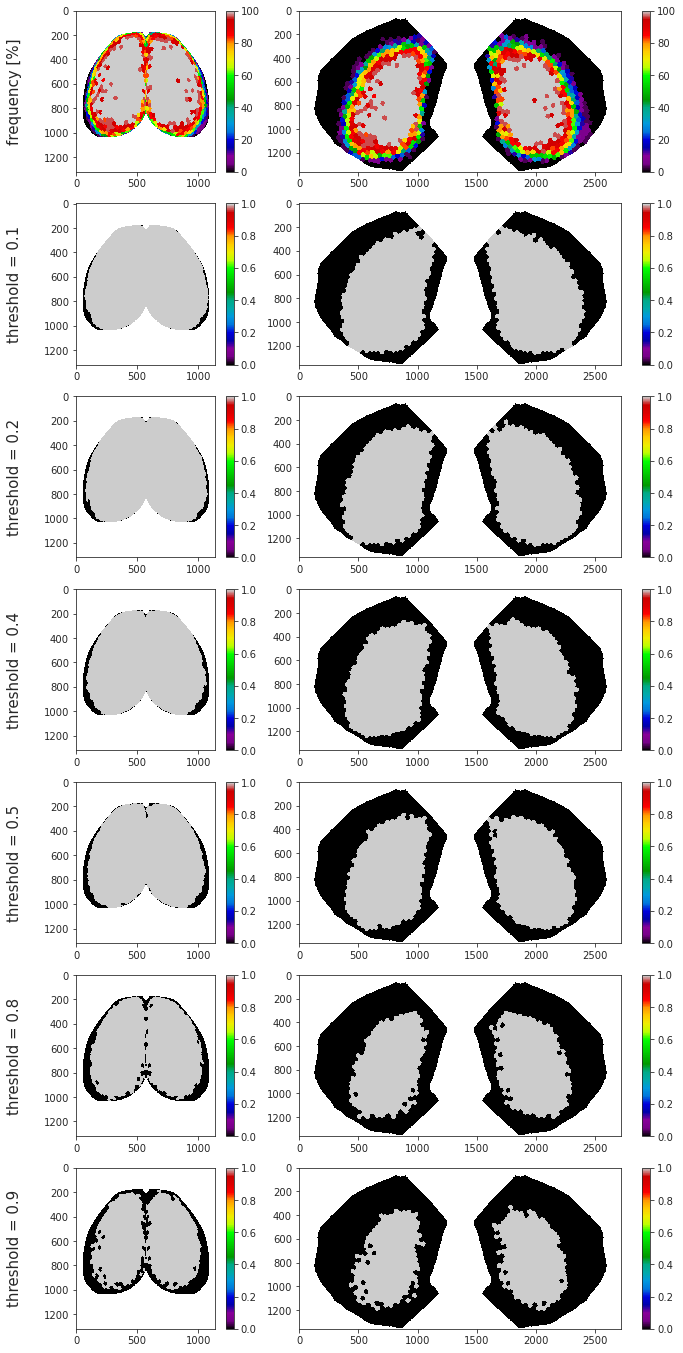

accept ratio: 72 %, reject ratio: 28 %, using a presence threshold of 10.0 %
a total of 996 regions were accepted

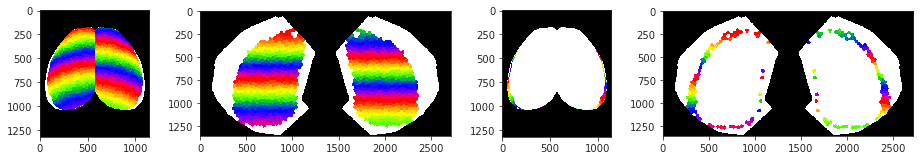

In [10]:
_ = mice.parcel.show_accepted_regions_2d(mice, 0.1)

In [4]:
from nancorrmp.nancorrmp import NaNCorrMp
from analysis.hierarchical import get_clust_graph, sp_hier

def fit_hier_group(mode, task):
    mice = Mice((768, 4))
    mice.setup_func_data(task)
    proc, *_ = mice.get_data_containers(mode)

    adj_pears = []
    adj_spear = []
    for key, func in tqdm(proc.items()):
        if mice.looper[key][-1] < 0:
            continue

        base = Base(mice, key=key, mode=mode, task=task)

        a, p = NaNCorrMp.calculate_with_p_value(base.data)
        a[p > 0.05] = np.nan
        adj_pears.append(np.expand_dims(a, 0))

        a, p = sp_stats.spearmanr(base.data, axis=1)
        a[p > 0.05] = np.nan
        adj_spear.append(np.expand_dims(a, 0))

    adj_pears = np.concatenate(adj_pears)
    adj_pears = bn.nanmean(adj_pears, 0)
    adj_spear = np.concatenate(adj_spear)
    adj_spear = bn.nanmean(adj_spear, 0)

    for i in range(len(adj_pears)):
        nans = np.isnan(adj_pears[i])
        adj_pears[i][nans] = bn.nanmean(adj_pears[i])

    for i in range(len(adj_spear)):
        nans = np.isnan(adj_spear[i])
        adj_spear[i][nans] = bn.nanmean(adj_spear[i])

    a_sym = (adj_pears + adj_pears.T) / 2
    d_pears = 1 - a_sym

    a_sym = (adj_spear + adj_spear.T) / 2
    d_spear = 1 - a_sym
    
    z_pears = sp_hier.linkage(
        sp_dist.squareform(d_pears),
        method='ward',
        metric='correlation',
        optimal_ordering=True,
    )
    result = get_clust_graph(
        linkage_mat=z_pears,
        labels=base.l2n,
        num_clusters=5,
    )
    comm_vec = np.zeros(len(base.n2l))
    for c_idx, clist in result['cluster_assigns'].items():
        for lbl in clist:
            comm_vec[base.l2n[lbl]] = c_idx
    proj_pears = base.project_vec(comm_vec)

    z_spear = sp_hier.linkage(
        sp_dist.squareform(d_spear),
        method='ward',
        metric='correlation',
        optimal_ordering=True,
    )
    result = get_clust_graph(
        linkage_mat=z_spear,
        labels=base.l2n,
        num_clusters=5,
    )
    comm_vec = np.zeros(len(base.n2l))
    for c_idx, clist in result['cluster_assigns'].items():
        for lbl in clist:
            comm_vec[base.l2n[lbl]] = c_idx
    proj_spear = base.project_vec(comm_vec)
    
    output = {
        'd_pears': d_pears,
        'd_spear': d_spear,
        'proj_pears': proj_pears,
        'proj_spear': proj_spear,
    }
    return output

In [5]:
ca2_led = fit_hier_group('ca2', 'led')
ca2_rest = fit_hier_group('ca2', 'rest')

bold_led = fit_hier_group('bold-lite', 'led')
bold_rest = fit_hier_group('bold-lite', 'rest')

  0%|          | 0/130 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

  0%|          | 0/155 [00:00<?, ?it/s]

In [6]:
mice = Mice((768, 4))
base = Base(mice)

In [7]:
figs, sups = [], []

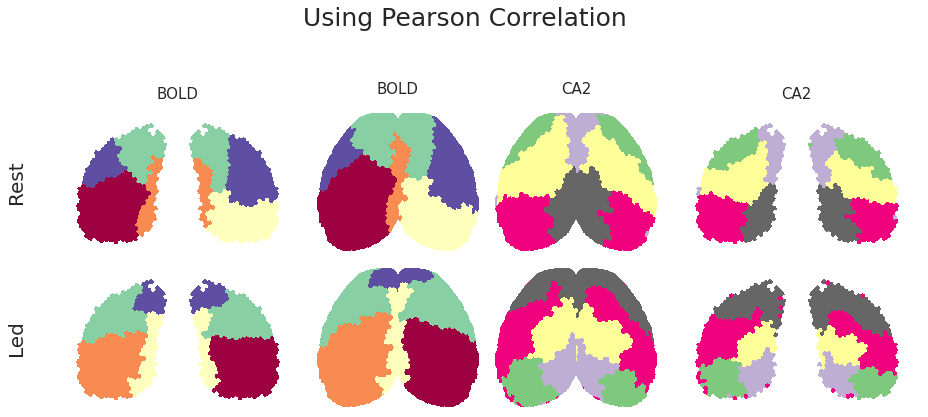

In [8]:
cmaps = ('Spectral_r', 'Accent_r')

fig, axes = create_figure(2, 4, (13, 5.5), gridspec_kw={'width_ratios': [1.5, 1, 1, 1.5]})

tr = base.trim2d(bold_rest['proj_pears'])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 0].imshow(x2plt, cmap=cmaps[0])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 1].imshow(x2plt, cmap=cmaps[0])
axes[0, 0].set_ylabel(f"Rest\n", fontsize=20)
axes[0, 0].set_title(f"BOLD", fontsize=15, y=1.04)
axes[0, 1].set_title(f"BOLD", fontsize=15, y=1.09)

tr = base.trim2d(ca2_rest['proj_pears'])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 2].imshow(x2plt, cmap=cmaps[1])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 3].imshow(x2plt, cmap=cmaps[1])
axes[0, 3].set_title(f"CA2", fontsize=15, y=1.04)
axes[0, 2].set_title(f"CA2", fontsize=15, y=1.09)


tr = base.trim2d(bold_led['proj_pears'])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 0].imshow(x2plt, cmap=cmaps[0])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 1].imshow(x2plt, cmap=cmaps[0])
axes[1, 0].set_ylabel(f"Led\n", fontsize=20)

tr = base.trim2d(ca2_led['proj_pears'])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 2].imshow(x2plt, cmap=cmaps[1])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 3].imshow(x2plt, cmap=cmaps[1])

sup = fig.suptitle("Using Pearson Correlation", fontsize=25, y=1.08)
remove_ticks(axes)
figs.append(fig)
sups.append(sup)
plt.show()

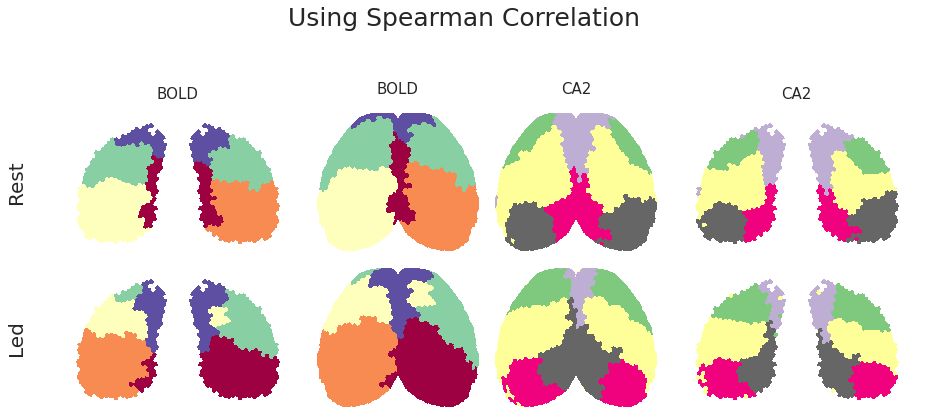

In [9]:
cmaps = ('Spectral_r', 'Accent_r')

fig, axes = create_figure(2, 4, (13, 5.5), gridspec_kw={'width_ratios': [1.5, 1, 1, 1.5]})

tr = base.trim2d(bold_rest['proj_spear'])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 0].imshow(x2plt, cmap=cmaps[0])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 1].imshow(x2plt, cmap=cmaps[0])
axes[0, 0].set_ylabel(f"Rest\n", fontsize=20)
axes[0, 0].set_title(f"BOLD", fontsize=15, y=1.04)
axes[0, 1].set_title(f"BOLD", fontsize=15, y=1.09)

tr = base.trim2d(ca2_rest['proj_spear'])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 2].imshow(x2plt, cmap=cmaps[1])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 3].imshow(x2plt, cmap=cmaps[1])
axes[0, 3].set_title(f"CA2", fontsize=15, y=1.04)
axes[0, 2].set_title(f"CA2", fontsize=15, y=1.09)


tr = base.trim2d(bold_led['proj_spear'])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 0].imshow(x2plt, cmap=cmaps[0])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 1].imshow(x2plt, cmap=cmaps[0])
axes[1, 0].set_ylabel(f"Led\n", fontsize=20)

tr = base.trim2d(ca2_led['proj_spear'])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 2].imshow(x2plt, cmap=cmaps[1])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 3].imshow(x2plt, cmap=cmaps[1])

sup = fig.suptitle("Using Spearman Correlation", fontsize=25, y=1.08)
remove_ticks(axes)
figs.append(fig)
sups.append(sup)
plt.show()

In [10]:
save_fig(figs, sups, pjoin(tmp_dir, 'hierarchical_group_gsr.pdf'), multi=True)

## NO GSR

In [8]:
figs, sups = [], []

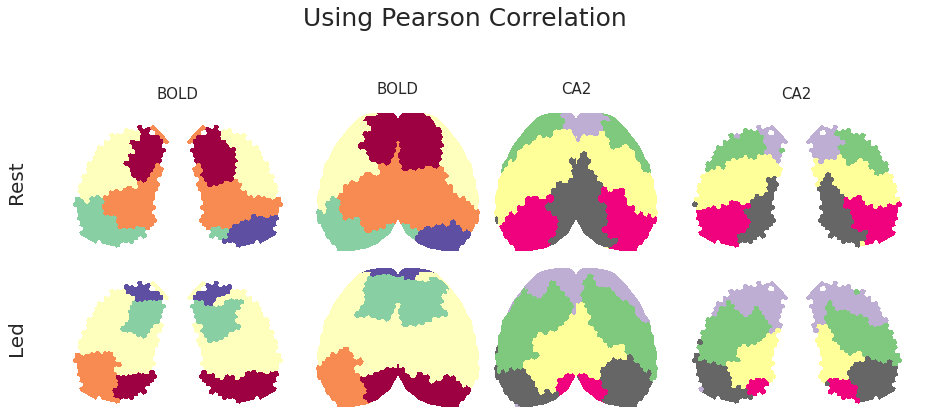

In [9]:
cmaps = ('Spectral_r', 'Accent_r')

fig, axes = create_figure(2, 4, (13, 5.5), gridspec_kw={'width_ratios': [1.5, 1, 1, 1.5]})

tr = base.trim2d(bold_rest['proj_pears'])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 0].imshow(x2plt, cmap=cmaps[0])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 1].imshow(x2plt, cmap=cmaps[0])
axes[0, 0].set_ylabel(f"Rest\n", fontsize=20)
axes[0, 0].set_title(f"BOLD", fontsize=15, y=1.04)
axes[0, 1].set_title(f"BOLD", fontsize=15, y=1.09)

tr = base.trim2d(ca2_rest['proj_pears'])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 2].imshow(x2plt, cmap=cmaps[1])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 3].imshow(x2plt, cmap=cmaps[1])
axes[0, 3].set_title(f"CA2", fontsize=15, y=1.04)
axes[0, 2].set_title(f"CA2", fontsize=15, y=1.09)


tr = base.trim2d(bold_led['proj_pears'])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 0].imshow(x2plt, cmap=cmaps[0])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 1].imshow(x2plt, cmap=cmaps[0])
axes[1, 0].set_ylabel(f"Led\n", fontsize=20)

tr = base.trim2d(ca2_led['proj_pears'])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 2].imshow(x2plt, cmap=cmaps[1])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 3].imshow(x2plt, cmap=cmaps[1])

sup = fig.suptitle("Using Pearson Correlation", fontsize=25, y=1.08)
remove_ticks(axes)
figs.append(fig)
sups.append(sup)
plt.show()

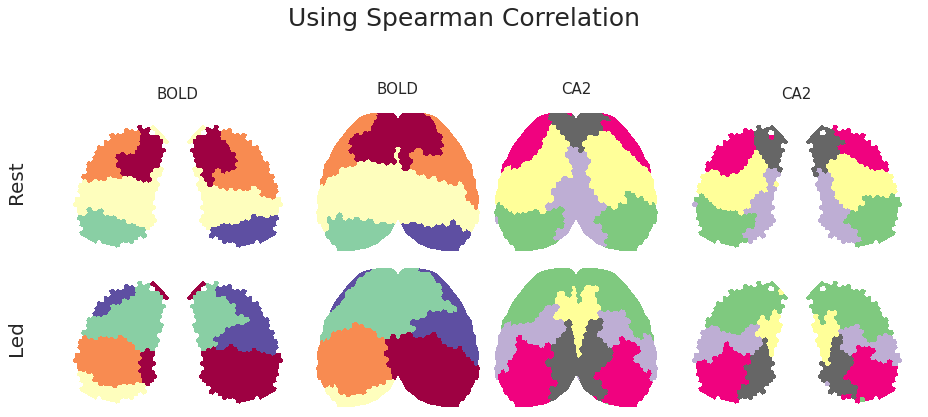

In [10]:
cmaps = ('Spectral_r', 'Accent_r')

fig, axes = create_figure(2, 4, (13, 5.5), gridspec_kw={'width_ratios': [1.5, 1, 1, 1.5]})

tr = base.trim2d(bold_rest['proj_spear'])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 0].imshow(x2plt, cmap=cmaps[0])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 1].imshow(x2plt, cmap=cmaps[0])
axes[0, 0].set_ylabel(f"Rest\n", fontsize=20)
axes[0, 0].set_title(f"BOLD", fontsize=15, y=1.04)
axes[0, 1].set_title(f"BOLD", fontsize=15, y=1.09)

tr = base.trim2d(ca2_rest['proj_spear'])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 2].imshow(x2plt, cmap=cmaps[1])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 3].imshow(x2plt, cmap=cmaps[1])
axes[0, 3].set_title(f"CA2", fontsize=15, y=1.04)
axes[0, 2].set_title(f"CA2", fontsize=15, y=1.09)


tr = base.trim2d(bold_led['proj_spear'])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 0].imshow(x2plt, cmap=cmaps[0])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 1].imshow(x2plt, cmap=cmaps[0])
axes[1, 0].set_ylabel(f"Led\n", fontsize=20)

tr = base.trim2d(ca2_led['proj_spear'])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 2].imshow(x2plt, cmap=cmaps[1])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 3].imshow(x2plt, cmap=cmaps[1])

sup = fig.suptitle("Using Spearman Correlation", fontsize=25, y=1.08)
remove_ticks(axes)
figs.append(fig)
sups.append(sup)
plt.show()

In [11]:
save_fig(figs, sups, pjoin(tmp_dir, 'hierarchical_group_nogsr.pdf'), multi=True)

In [12]:
from nancorrmp.nancorrmp import NaNCorrMp
from analysis.hierarchical import get_clust_graph, sp_hier

def fit_hier_group(mode, task, nogsr, perc=10):
    mice = Mice((512, 4))
    mice.setup_func_data(task, nogsr=nogsr)
    proc, *_ = mice.get_data_containers(mode)

    adj_pears = []
    adj_spear = []
    for key, func in tqdm(proc.items()):
        if mice.looper[key][-1] < 0:
            continue

        base = Base(mice, key=key, mode=mode, task=task)

        a, p = NaNCorrMp.calculate_with_p_value(base.data)
        a[p > 0.05] = np.nan
        adj_pears.append(np.expand_dims(a, 0))

        a, p = sp_stats.spearmanr(base.data, axis=1)
        a[p > 0.05] = np.nan
        adj_spear.append(np.expand_dims(a, 0))

    adj_pears = np.concatenate(adj_pears)
    adj_pears = bn.nanmean(adj_pears, 0)
    adj_spear = np.concatenate(adj_spear)
    adj_spear = bn.nanmean(adj_spear, 0)

    for i in range(len(adj_pears)):
        nans = np.isnan(adj_pears[i])
        adj_pears[i][nans] = bn.nanmean(adj_pears[i])

    for i in range(len(adj_spear)):
        nans = np.isnan(adj_spear[i])
        adj_spear[i][nans] = bn.nanmean(adj_spear[i])
        
    al = adj_pears[np.tril_indices_from(adj_pears)]
    thres = np.percentile(al, 100 - perc)
    adj_pears[adj_pears <= thres] = 0.0
    
    al = adj_spear[np.tril_indices_from(adj_spear)]
    thres = np.percentile(al, 100 - perc)
    adj_spear[adj_spear <= thres] = 0.0

    a_sym = (adj_pears + adj_pears.T) / 2
    d_pears = 1 - a_sym

    a_sym = (adj_spear + adj_spear.T) / 2
    d_spear = 1 - a_sym
    
    z_pears = sp_hier.linkage(
        sp_dist.squareform(d_pears),
        method='ward',
        metric='correlation',
        optimal_ordering=True,
    )
    result = get_clust_graph(
        linkage_mat=z_pears,
        labels=base.l2n,
        num_clusters=5,
    )
    comm_vec = np.zeros(len(base.n2l))
    for c_idx, clist in result['cluster_assigns'].items():
        for lbl in clist:
            comm_vec[base.l2n[lbl]] = c_idx
    proj_pears = base.project_vec(comm_vec)

    z_spear = sp_hier.linkage(
        sp_dist.squareform(d_spear),
        method='ward',
        metric='correlation',
        optimal_ordering=True,
    )
    result = get_clust_graph(
        linkage_mat=z_spear,
        labels=base.l2n,
        num_clusters=5,
    )
    comm_vec = np.zeros(len(base.n2l))
    for c_idx, clist in result['cluster_assigns'].items():
        for lbl in clist:
            comm_vec[base.l2n[lbl]] = c_idx
    proj_spear = base.project_vec(comm_vec)
    
    output = {
        'd_pears': d_pears,
        'd_spear': d_spear,
        'proj_pears': proj_pears,
        'proj_spear': proj_spear,
    }
    return output

In [13]:
ca2_led = fit_hier_group('ca2', 'led', True)
ca2_rest = fit_hier_group('ca2', 'rest', True)

bold_led = fit_hier_group('bold-lite', 'led', True)
bold_rest = fit_hier_group('bold-lite', 'rest', True)

  0%|          | 0/130 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

In [14]:
figs, sups = [], []

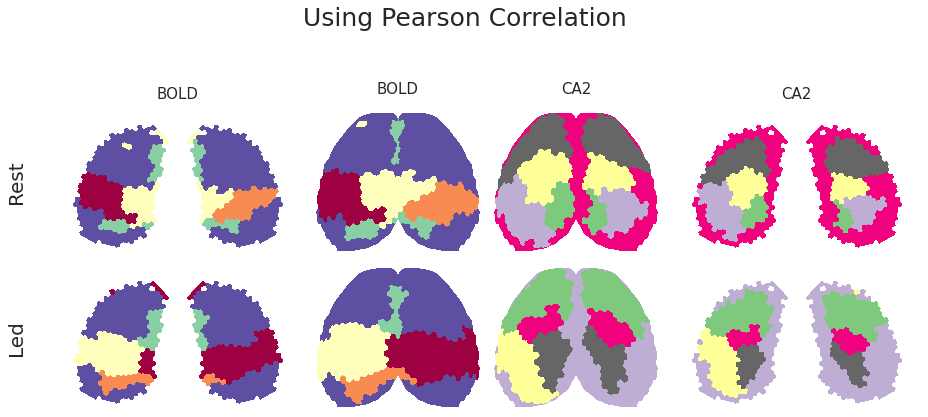

In [15]:
cmaps = ('Spectral_r', 'Accent_r')

fig, axes = create_figure(2, 4, (13, 5.5), gridspec_kw={'width_ratios': [1.5, 1, 1, 1.5]})

tr = base.trim2d(bold_rest['proj_pears'])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 0].imshow(x2plt, cmap=cmaps[0])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 1].imshow(x2plt, cmap=cmaps[0])
axes[0, 0].set_ylabel(f"Rest\n", fontsize=20)
axes[0, 0].set_title(f"BOLD", fontsize=15, y=1.04)
axes[0, 1].set_title(f"BOLD", fontsize=15, y=1.09)

tr = base.trim2d(ca2_rest['proj_pears'])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 2].imshow(x2plt, cmap=cmaps[1])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 3].imshow(x2plt, cmap=cmaps[1])
axes[0, 3].set_title(f"CA2", fontsize=15, y=1.04)
axes[0, 2].set_title(f"CA2", fontsize=15, y=1.09)


tr = base.trim2d(bold_led['proj_pears'])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 0].imshow(x2plt, cmap=cmaps[0])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 1].imshow(x2plt, cmap=cmaps[0])
axes[1, 0].set_ylabel(f"Led\n", fontsize=20)

tr = base.trim2d(ca2_led['proj_pears'])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 2].imshow(x2plt, cmap=cmaps[1])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 3].imshow(x2plt, cmap=cmaps[1])

sup = fig.suptitle("Using Pearson Correlation", fontsize=25, y=1.08)
remove_ticks(axes)
figs.append(fig)
sups.append(sup)
plt.show()

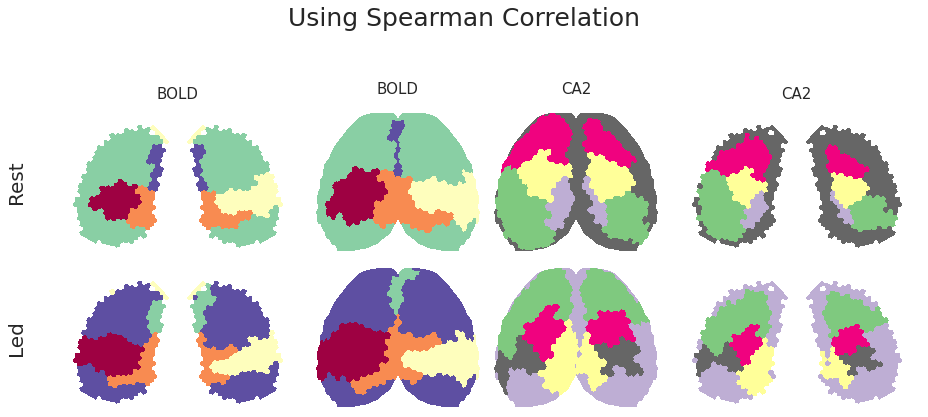

In [16]:
cmaps = ('Spectral_r', 'Accent_r')

fig, axes = create_figure(2, 4, (13, 5.5), gridspec_kw={'width_ratios': [1.5, 1, 1, 1.5]})

tr = base.trim2d(bold_rest['proj_spear'])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 0].imshow(x2plt, cmap=cmaps[0])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 1].imshow(x2plt, cmap=cmaps[0])
axes[0, 0].set_ylabel(f"Rest\n", fontsize=20)
axes[0, 0].set_title(f"BOLD", fontsize=15, y=1.04)
axes[0, 1].set_title(f"BOLD", fontsize=15, y=1.09)

tr = base.trim2d(ca2_rest['proj_spear'])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 2].imshow(x2plt, cmap=cmaps[1])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[0, 3].imshow(x2plt, cmap=cmaps[1])
axes[0, 3].set_title(f"CA2", fontsize=15, y=1.04)
axes[0, 2].set_title(f"CA2", fontsize=15, y=1.09)


tr = base.trim2d(bold_led['proj_spear'])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 0].imshow(x2plt, cmap=cmaps[0])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 1].imshow(x2plt, cmap=cmaps[0])
axes[1, 0].set_ylabel(f"Led\n", fontsize=20)

tr = base.trim2d(ca2_led['proj_spear'])
x2plt = tr['proj-top'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 2].imshow(x2plt, cmap=cmaps[1])
x2plt = tr['proj-flat'].squeeze()
x2plt = np.ma.masked_where(x2plt < 0.01, x2plt)
axes[1, 3].imshow(x2plt, cmap=cmaps[1])

sup = fig.suptitle("Using Spearman Correlation", fontsize=25, y=1.08)
remove_ticks(axes)
figs.append(fig)
sups.append(sup)
plt.show()

In [17]:
save_fig(figs, sups, pjoin(tmp_dir, 'hierarchical_group_nogsr_p20.pdf'), multi=True)